# GPR

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor                 
from sklearn.gaussian_process.kernels import RBF,RationalQuadratic
from sklearn.gaussian_process.kernels import ExpSineSquared,Matern
from sklearn.gaussian_process.kernels import WhiteKernel, ConstantKernel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import (RationalQuadratic,Exponentiation)
from sklearn.gaussian_process.kernels import CompoundKernel
import matplotlib.pyplot as plt
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer

In [2]:
# Data=pd.read_csv('1000_sample.csv')
# new=Data.loc[(Data['HIC15(-)'] !=0)]
# # new=new.reindex(np.arange(len(new.index)))
# # new=new.loc[(new['HIC15(-)'] <10000)]

# X = new[new.columns[1:23]]
# y = new['HIC15(-)']
# X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=13)

# plt.figure()
# ind = np.arange(len(y)) 
# plt.scatter(ind,y, color="b",label="Training")
# ind = np.arange(len(y_Test))
# plt.scatter(ind,y_Test, color="r",label="Test")
# plt.title("Unseen")
# plt.xlabel("Actual")
# plt.ylabel("pred")
# plt.legend(loc="best")
# plt.show()

C:\Users\ypyas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ypyas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


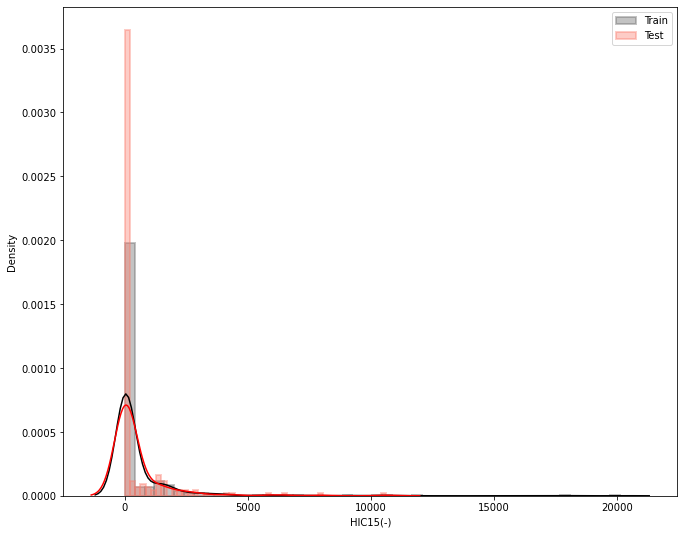

In [8]:
plt.figure(figsize=(11, 9))
sns.distplot(y,hist=True,color='k',hist_kws=dict(color='dimgray',edgecolor="dimgray", linewidth=2),label='Train')
sns.distplot(y_Test,hist=True,color='r',hist_kws=dict(color='salmon',edgecolor="salmon", linewidth=2),label='Test')
plt.legend(loc="best",frameon=True)
plt.grid( False)

In [2]:
state=1

In [2]:
Data=pd.read_csv('1000_2out.csv')
X=Data[Data.columns[1:23]]
y=Data[Data.columns[23]]

In [3]:
modo=GaussianProcessRegressor(kernel=RationalQuadratic(alpha=1, length_scale=1) ** 2 + WhiteKernel(noise_level=5),
                         n_restarts_optimizer=4, normalize_y=True,
                         random_state=0)

# mod = TransformedTargetRegressor(regressor=modo,func=np.log,inverse_func=np.exp)
mod = TransformedTargetRegressor(regressor=modo,transformer=QuantileTransformer(output_distribution='normal'))

In [4]:
cv = KFold(n_splits=10, random_state=1)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [5]:
y_actual = []
predict = []
# X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=state)


In [6]:
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_mean_absolute_error',train_sizes=[50,150,250,500,750,895])

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (250). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (500). n_quantiles is set to n_samples.
  warnings

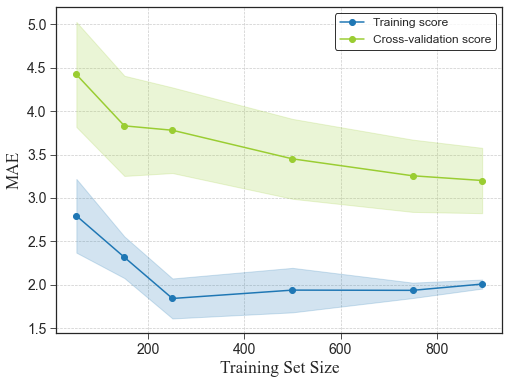

In [7]:
# train_mean=-np.mean(train_score,axis=1)
# train_std=-np.std(train_score,axis=1)
# test_mean=-np.mean(test_score,axis=1)
# test_std=-np.std(test_score,axis=1)
# csfont = {'fontname':'Times New Roman'}    
# plt.figure(figsize=(10, 6))
# plt.style.use('seaborn-whitegrid')
# # plt.subplots(1)
# plt.plot(train_size,train_mean, 'o-', color='gray',label="Training score",markeredgecolor='gray')
# plt.plot(train_size, test_mean, 'o-', color='k',label="Cross-validation score",markeredgecolor='k')
# plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, color='gray',alpha=0.1)
# plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, color='k', alpha=0.1)
# plt.title("Learning Curve for {}".format(str(mod).split('(')[0]),**csfont)
# plt.xlabel("Training Set Size",**csfont)
# plt.ylabel("RMS Error",**csfont)
# plt.rcParams["font.family"] = "Times New Roman"
# plt.legend(loc="best",frameon=True)
# plt.show()


train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
# plt.figure()
# plt.style.use('seaborn-ticks')
# csfont = {'fontname':'Times New Roman'}
# plt.subplots(1)
# plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
# plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
# plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, color="b", alpha=0.2)
# plt.fill_between(train_size, test_mean - test_std, test_mean + test_std,color="g", alpha=0.2)
# # plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
# plt.xlabel("Training Set Size", fontsize='xx-large',**csfont)
# plt.ylabel("MAE", fontsize='xx-large',**csfont)
# leg = plt.legend(frameon=True,loc='best',prop={'size': 12})
# leg.get_frame().set_linewidth(1)
# leg.get_frame().set_edgecolor('k')
# plt.grid(linestyle = '--', linewidth = 0.7)
# plt.yticks(fontsize=14)
# plt.xticks(fontsize=14)
# # plt.savefig('repimg/140_hicxg', bbox_inches="tight")
# plt.show()
plt.figure(figsize=(8, 6))
plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
plt.plot(train_size,train_mean, 'o-', color="C0",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="yellowgreen",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, color="C0", alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, color="yellowgreen", alpha=0.2)
# plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size", fontsize='xx-large',**csfont)
plt.ylabel("MAE", fontsize='xx-large',**csfont)
leg = plt.legend(frameon=True,loc='best',prop={'size': 12})
leg.get_frame().set_linewidth(1)
leg.get_frame().set_edgecolor('k')
plt.grid(linestyle = '--', linewidth = 0.7)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# plt.savefig('gprLC', bbox_inches="tight")
plt.show()

In [8]:
pd.DataFrame(test_mean)

,0
0,4.422961
1,3.830767
2,3.780166
3,3.450470
4,3.255557
5,3.200947


In [10]:
X = X.to_numpy()
y = y.to_numpy()

In [11]:
y_Test=y_Test.to_numpy()

In [12]:
kf=cv

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 6.166837



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 3.867344



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 4.958690



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 3.429245



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 4.060320



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 4.734087



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (717). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 5.192242



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (717). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 3.965430



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (717). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 4.786874



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (717). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 3.598860



In [13]:
ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    0.961649
dtype: float64  error mean --->0    3.251384
Name: mean, dtype: float64  error std --->0    3.126691
Name: std, dtype: float64


In [14]:
ytr=HBM_Train.predict(X)
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=np.sqrt((y[u]-ytr[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    0.893021
dtype: float64  error mean --->0    1.8392
Name: mean, dtype: float64  error std --->0    1.642445
Name: std, dtype: float64


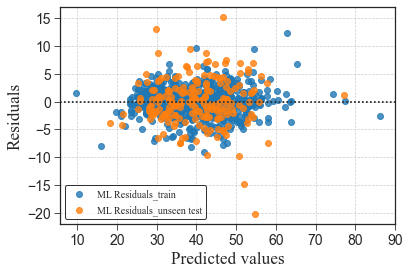

In [15]:
plt.figure()

plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
a=sns.residplot(y=abs(y), x=abs(ytr),label='ML Residuals_train')
r=sns.residplot(y=abs(y_Test), x=abs(ytestunk),label='ML Residuals_unseen test')
plt.grid( linestyle='--')
# plt.title('Residuals plot ', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='xx-large',**csfont)
plt.ylabel('Residuals', fontsize='xx-large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"

leg = plt.legend(frameon=True,loc='best')
leg.get_frame().set_linewidth(1)
leg.get_frame().set_edgecolor('k')
plt.grid(linestyle = '--', linewidth = 0.7)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# plt.xlim([20,50])
# plt.ylim([-6,6])
# plt.savefig('repimg/nkfrc_130_res', bbox_inches="tight")
plt.show()

In [16]:
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=y[u]-ytr[u]
pd.DataFrame(err).describe()

,0
count,796.000000
mean,0.020473
std,2.466600
min,-9.204614
25%,-1.411294
50%,0.061634
75%,1.451597
max,13.631667


In [17]:
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=y_Test[u]-ytestunk[u]
pd.DataFrame(err).describe()

,0
count,199.000000
mean,-0.327216
std,4.504828
min,-23.018183
25%,-2.621603
50%,-0.187767
75%,2.224142
max,14.389046


# train score

error COV--->0    0.893021
dtype: float64  error mean --->0    1.8392
Name: mean, dtype: float64  error std --->0    1.642445
Name: std, dtype: float64


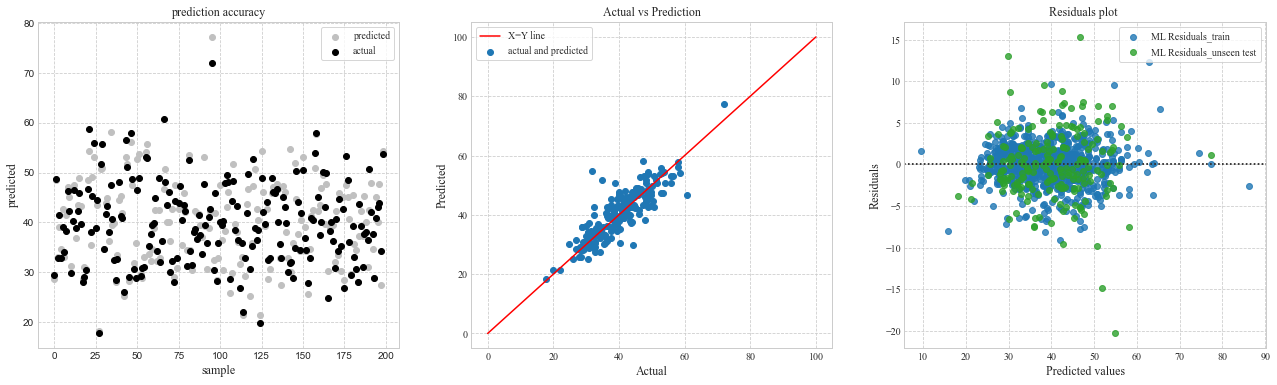

In [14]:
plt.figure(figsize=(22, 6))
plt.style.use('seaborn-whitegrid')
csfont = {'fontname':'Times New Roman'}
plt.subplot(1,3,1)
plt.scatter(np.arange(0,len(ytestunk)),ytestunk,color='silver',label='predicted')
plt.scatter(np.arange(0,len(y_Test)),y_Test,label='actual',color='k')
plt.grid( linestyle='--')
plt.title('prediction accuracy', fontsize='large',**csfont)
plt.xlabel('sample', fontsize='large',**csfont)
plt.ylabel('predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend(loc="best",frameon=True)

plt.subplot(1,3,2)
plt.scatter(y_Test,ytestunk,label='actual and predicted',color='C0')
plt.plot([0,100],[0,100],color='r',label='X=Y line')
plt.grid( linestyle='--')
plt.title('Actual vs Prediction', fontsize='large',**csfont)
plt.xlabel('Actual', fontsize='large',**csfont)
plt.ylabel('Predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend(loc="best",frameon=True)

plt.subplot(1,3,3)
a=sns.residplot(y=abs(y), x=abs(ytr),label='ML Residuals_train',color='C0')
r=sns.residplot(y=abs(y_Test), x=abs(ytestunk),label='ML Residuals_unseen test',color='C2')
plt.grid( linestyle='--')
plt.title('Residuals plot ', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='large',**csfont)
plt.ylabel('Residuals', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend(loc="best",frameon=True)


plt.show()